In [2]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [3]:
look_back = 8

In [4]:
df = pd.read_csv("datapoints.csv", parse_dates=[0])
df.set_axis(df['timestamp'], inplace=True)

mask = df.name.str.contains("Videolab")
videolab = df[~mask]
df = videolab.resample(rule='15T', closed='left', label='left').mean().apply(np.ceil)

# INPUT PARAMS:
# Data source -> which column contains the data to be predicted
# Preferred sampling period (EQUAL TO output period)
# Lookback_time -> [6,7,8,9] -> 10 OR [1,2,3,4,5,6,7,8,9] -> 10

Split the data into test and train, as wel as extracting the dates, later used for plotting

In [5]:

df["timestamp"] = df.index
df["value"] = df["value"].fillna(0)

parking_data = df["value"].values
parking_data = parking_data.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(parking_data))

parking_train = parking_data[:split]
parking_test = parking_data[split:]

date_train = df["timestamp"][:split]
date_test = df["timestamp"][split:]

Creation of the test and train generator using the `TimeseriesGenerator` class from TensorFlow. This generator class automatically transforms this data from a series to a supervised learning model.

In [6]:
train_generator = TimeseriesGenerator(parking_train, parking_train, length=look_back, batch_size=5)
test_generator = TimeseriesGenerator(parking_test, parking_test, length=look_back, batch_size=1)

Define LSTM model with 25 epochs of training

In [7]:
model = Sequential()

model.add(LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

num_epochs = 25

model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
484/484 [==============================] - 1s 2ms/step - loss: 0.7189
Epoch 2/25
484/484 [==============================] - 1s 2ms/step - loss: 0.4151
Epoch 3/25
484/484 [==============================] - 1s 2ms/step - loss: 0.3885
Epoch 4/25
484/484 [==============================] - 1s 2ms/step - loss: 0.3663
Epoch 5/25
484/484 [==============================] - 1s 2ms/step - loss: 0.3518
Epoch 6/25
484/484 [==============================] - 1s 2ms/step - loss: 0.3448
Epoch 7/25
484/484 [==============================] - 1s 2ms/step - loss: 0.3433
Epoch 8/25
484/484 [==============================] - 1s 2ms/step - loss: 0.3403
Epoch 9/25
484/484 [==============================] - 1s 2ms/step - loss: 0.3389
Epoch 10/25
484/484 [==============================] - 1s 2ms/step - loss: 0.3394
Epoch 11/25
484/484 [==============================] - 1s 2ms/step - loss: 0.3412
Epoch 12/25
484/484 [==========

In [8]:
model.save("15M")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: 15M\assets


Plot the predictions and the actual data

In [9]:
prediction = model.predict(test_generator)
prediction = model.predict(test_generator)

parking_train = parking_train.reshape((-1))
parking_test = parking_test.reshape((-1))
prediction = prediction.reshape((-1))

plt.plot(date_test[start_index:end_index], prediction[start_index:end_index], label='prediction')
plt.plot(date_test[start_index:end_index], parking_test[start_index:end_index], label='actual')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()

NameError: name 'start_index' is not defined

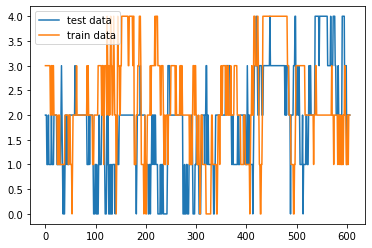

In [84]:
plt.plot(test_generator.data, label="test data")
plt.plot(train_generator.data[20:len(test_generator.data)+20], label="train data")
plt.legend(loc="best")